In [1]:
import pandas as pd
import numpy as np
movies=pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
ratings=pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
len(movies)

9742

In [4]:
len(ratings)

100836

In [5]:
ratings=ratings[['userId','movieId','rating']]

In [6]:
ratings_df=ratings.groupby(['userId','movieId']).aggregate(np.max)

In [7]:
ratings_df.head(10)

rating
userId movieId        
1      1           4.0
       3           4.0
       6           4.0
       47          5.0
       50          5.0
       70          3.0
       101         5.0
       110         4.0
       151         5.0
       157         5.0

In [8]:
len(ratings['userId'].unique())

610

In [10]:
count_ratings=ratings.groupby('rating').count()
count_ratings['perc_total']=round(count_ratings['userId']*100/count_ratings['userId'].sum(),1)
count_ratings

,userId,movieId,perc_total
rating,,,
0.5,1370,1370,1.4
1.0,2811,2811,2.8
1.5,1791,1791,1.8
2.0,7551,7551,7.5
2.5,5550,5550,5.5
3.0,20047,20047,19.9
3.5,13136,13136,13.0
4.0,26818,26818,26.6
4.5,8551,8551,8.5


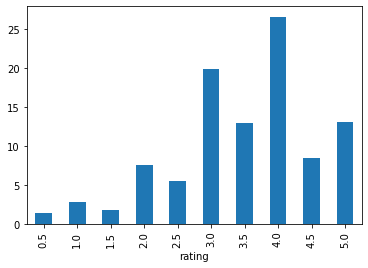

In [11]:
count_ratings['perc_total'].plot.bar()

In [12]:
len(movies)

9742

In [13]:
genres=movies['genres']
genres.head()

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

In [14]:
genre_list=""
for index,row in movies.iterrows():
    genre_list+=row.genres+"|"
genre_list_split=genre_list.split("|")
new_list=list(set(genre_list_split))
new_list.remove('')
new_list

['Action',
 'Mystery',
 'IMAX',
 'War',
 'Western',
 'Romance',
 'Sci-Fi',
 'Fantasy',
 'Thriller',
 'Animation',
 'Children',
 'Musical',
 'Documentary',
 'Film-Noir',
 'Crime',
 'Horror',
 'Drama',
 'Comedy',
 '(no genres listed)',
 'Adventure']

In [15]:
m=movies.copy()
for genre in new_list:
    m[genre]=m.apply(lambda _:int(genre in _.genres),axis=1)
m.head()

,movieId,title,genres,Action,Mystery,IMAX,War,Western,Romance,Sci-Fi,...,Children,Musical,Documentary,Film-Noir,Crime,Horror,Drama,Comedy,(no genres listed),Adventure
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
avg=pd.DataFrame(ratings.groupby('movieId')['rating'].agg(['mean','count']))
avg['movieId']=avg.index
avg.head()

,mean,count,movieId
movieId,,,
1,3.920930,215,1
2,3.431818,110,2
3,3.259615,52,3
4,2.357143,7,4
5,3.071429,49,5


In [17]:
np.percentile(avg['count'],80)

12.0

In [18]:
idx2title={int(row['movieId']):row['title'] for _,row in movies.iterrows()}
title2idx={j:i for i,j in idx2title.items()}

In [19]:
highratings=ratings[ratings.rating>=4]
itemsets=[[idx2title[mov] for mov in highratings[highratings.userId==user].movieId]
         for user in highratings.userId
         ]

In [20]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(itemsets).transform(itemsets)
df=pd.DataFrame(te_ary,columns=te.columns_)

In [25]:
df.head(1000)

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),...,Zombieland (2009),Zookeeper (2011),Zoolander (2001),Zootopia (2016),Zulu (1964),[REC] (2007),[REC]² (2009),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
from mlxtend.frequent_patterns import apriori,association_rules
f=apriori(df,min_support=0.2,use_colnames=True,max_len=2)

In [22]:
rules=association_rules(f,metric='lift',min_threshold=2)

In [24]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Blade Runner (1982)),(2001: A Space Odyssey (1968)),0.336414,0.333059,0.240243,0.714128,2.144151,0.128197,2.333009
1,(2001: A Space Odyssey (1968)),(Blade Runner (1982)),0.333059,0.336414,0.240243,0.721323,2.144151,0.128197,2.381197
2,(Dr. Strangelove or: How I Learned to Stop Wor...,(2001: A Space Odyssey (1968)),0.319926,0.333059,0.218979,0.684468,2.055096,0.112425,2.113703
3,(2001: A Space Odyssey (1968)),(Dr. Strangelove or: How I Learned to Stop Wor...,0.333059,0.319926,0.218979,0.657478,2.055096,0.112425,1.985492
4,(Aladdin (1992)),"(Lion King, The (1994))",0.332565,0.331083,0.232462,0.698997,2.111246,0.122355,2.222296
5,"(Lion King, The (1994))",(Aladdin (1992)),0.331083,0.332565,0.232462,0.702126,2.111246,0.122355,2.240665
6,(Aliens (1986)),(Alien (1979)),0.306319,0.421573,0.268938,0.877965,2.082595,0.139802,4.739855
7,(Alien (1979)),(Aliens (1986)),0.421573,0.306319,0.268938,0.637939,2.082595,0.139802,1.915924
8,"(Amelie (Fabuleux destin d'Amélie Poulain, Le)...",(Eternal Sunshine of the Spotless Mind (2004)),0.316427,0.354323,0.227172,0.717929,2.026200,0.115055,2.289057
9,(Eternal Sunshine of the Spotless Mind (2004)),"(Amelie (Fabuleux destin d'Amélie Poulain, Le)...",0.354323,0.316427,0.227172,0.641143,2.026200,0.115055,1.904865
